In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DIP/A1/ruler.512.tiff")

In [ ]:
image.shape

(512, 512, 3)

# Gaussian Filter

In [ ]:
# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)


# Convolution

In [ ]:
def conv(image, filter):
    iw,ih,id = image.shape

    fw,fh = filter.shape
    out = np.zeros((iw-fw+1,ih-fh+1,id))

    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])

    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

# Applying 3 X 3 Gaussian Filter

In [ ]:
(gfw,gfh) = (3,3)

image2 = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

gaussianFilter = gaussFilter((gfw,gfh),2)
gaussian_image = conv(image2, gaussianFilter)
print(gaussian_image.shape)

cv2.imwrite("/content/drive/MyDrive/DIP/A1/gaussian_3x3_ruler.512.jpg",gaussian_image)

(512, 512, 3)


True

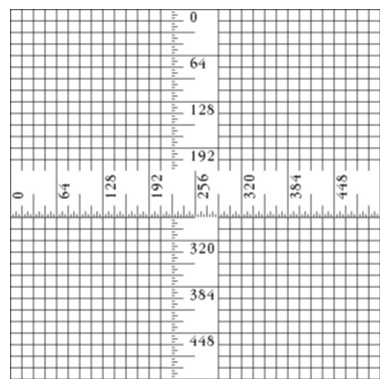

In [ ]:
img = mpimg.imread("/content/drive/MyDrive/DIP/A1/gaussian_3x3_ruler.512.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Applying 5 X 5 Guassian Filter

In [ ]:
(gfw,gfh) = (5,5)

image3 = np.pad(image, ((2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)

gaussianFilter = gaussFilter((gfw,gfh),2)
gaussian_image = conv(image3, gaussianFilter)

print(gaussian_image.shape)

cv2.imwrite("/content/drive/MyDrive/DIP/A1/gaussian_5x5_ruler.512.jpg",gaussian_image)

(512, 512, 3)


True

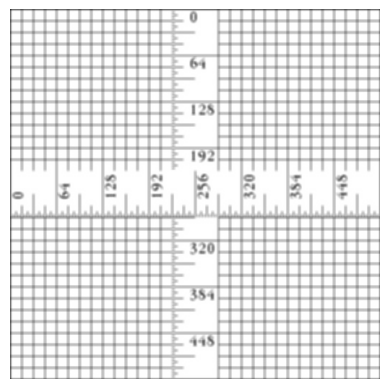

In [ ]:
img = mpimg.imread("/content/drive/MyDrive/DIP/A1/gaussian_5x5_ruler.512.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Median Filter

In [ ]:
row, col, depth = image.shape

# Applying 3x3 median filter

In [ ]:
median_3x3_image = np.zeros((row, col, depth), dtype=image.dtype)

In [ ]:
image4 = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

In [ ]:
for d in range(depth):
  for i in range(1, row+1):
    for j in range(1, col+1):

      neighbours = [image4[i - 1, j - 1, d], image4[i - 1, j, d], image4[i - 1, j + 1, d],
             image4[i, j - 1, d], image4[i, j, d], image4[i, j + 1, d],
             image4[i + 1, j - 1, d], image4[i + 1, j, d], image4[i + 1, j + 1, d]]

      neighbours_sorted = np.sort(neighbours)
      median_3x3_image[i -1][j-1][d] = neighbours_sorted[4]

In [ ]:
cv2.imwrite("/content/drive/MyDrive/DIP/A1/median_3x3_ruler.512.jpg", median_3x3_image)

True

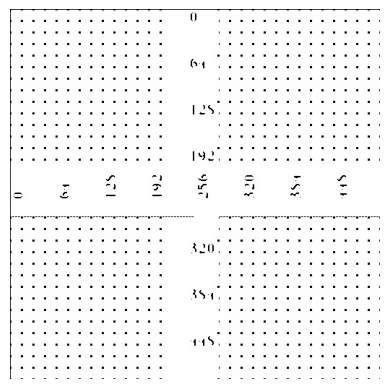

In [ ]:
img = mpimg.imread("/content/drive/MyDrive/DIP/A1/median_3x3_ruler.512.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Applying 5x5 Median Filter

In [ ]:
median_5x5_image = np.zeros((row, col, depth), dtype=image.dtype)

In [ ]:
image5 = np.pad(image, ((2, 2), (2, 2), (0, 0)), mode='constant', constant_values=0)

In [ ]:
for d in range(depth):
  for i in range(2, row+2):
    for j in range(2, col+2):

      neighbours = n = [image5[i - 2, j - 2 ,d], image5[i - 2, j - 1, d], image5[i - 2, j, d], image5[i - 2, j + 1, d], image5[i - 2, j + 2, d],
             image5[i - 1, j - 2, d], image5[i - 1, j - 1, d], image5[i - 1, j, d], image5[i - 1, j + 1, d], image5[i - 1, j + 2, d],
             image5[i, j - 2, d], image5[i, j - 1, d], image5[i, j, d], image5[i, j + 1, d], image5[i, j + 2, d],
             image5[i + 1, j - 2, d], image5[i + 1, j - 1, d], image5[i + 1, j, d], image5[i + 1, j + 1, d], image5[i + 1, j + 2, d],
             image5[i + 2, j - 2, d], image5[i + 2, j - 1, d], image5[i + 2, j, d], image5[i + 2, j + 1, d], image5[i + 2, j + 2, d]]

      neighbours_sorted = np.sort(neighbours)
      median_3x3_image[i -2][j-2][d] = neighbours_sorted[12]

In [ ]:
cv2.imwrite("/content/drive/MyDrive/DIP/A1/median_5x5_ruler.512.jpg", median_3x3_image)

True

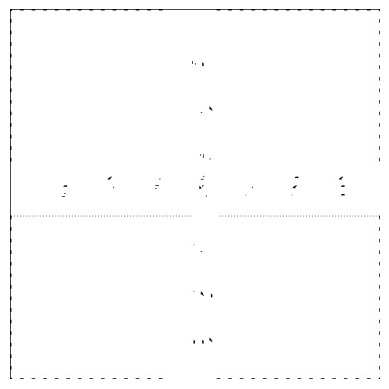

In [ ]:
img = mpimg.imread("/content/drive/MyDrive/DIP/A1/median_5x5_ruler.512.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()